<a href="https://colab.research.google.com/github/PriyanshuSaxena09/Netflix_TV_and-_Movies_Analysis/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unveiling Netflix: A Data Journey

Embark on an exploration of Netflix's vast content landscape through data analysis. Dive into our dataset, uncovering trends, patterns, and insights about the platform's offerings.

We'll navigate through Netflix's diverse library, examining release years, content types, genres, ratings, and production origins. From identifying popular genres to spotlighting top directors and actors, we'll paint a vivid picture of Netflix's content ecosystem.

# 1. Importing Libraries and Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import plotly.graph_objs as go
%matplotlib inline

##### Loading Data

In [2]:
df=pd.read_csv("netflix_titles.csv")

# 2. Dataset Overview


In [3]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Names Of Columns in Dataset

In [4]:
# Names of columns in the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
# Shape of the dataset
df.shape

(8807, 12)

In [6]:
# Total number of elements in the dataset
df.size

105684

In [7]:
# Data types of columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Complete Informatiion On Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Dataset Containing Numerical Values

In [9]:
# Summary statistics of numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# 3. Handling Missing Values


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Another way for identifying Null Values

In [11]:
[features for features in df.columns if df[features].isnull().sum()>1]

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

#### Using heat map to show null Value count

<Axes: >

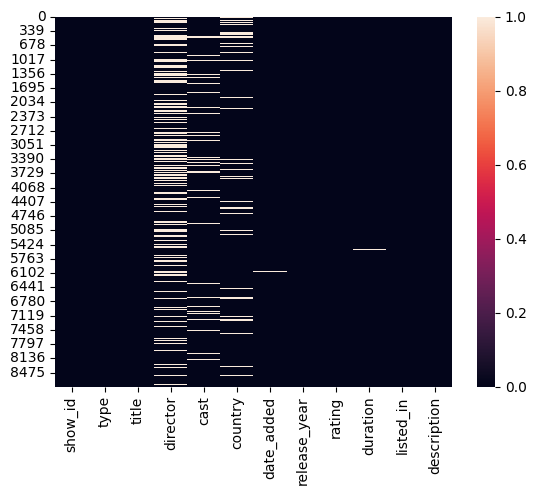

In [12]:
sns.heatmap(df.isnull())

# 4. Analysis of Total Content on Netflix


In [13]:
total_count=df.groupby(['show_id'])['show_id'].count().sum()
total_count

8807

In [14]:
shape=go.Figure()
shape.add_trace(go.Indicator(value=total_count))
shape=shape.update_layout(
template={'data':{"indicator":[{'title':{'text':"total content on netflix"},}]}})

In [15]:
shape.update_layout(margin=dict(l=50,r=5,b=0,t=30),showlegend=False,
                    plot_bgcolor='#333',paper_bgcolor='#333',title_x=0.5,
                   title_font=dict(size=25,color='#D81F26',family="Lato,sans-serif",),
font=dict(size=45,color='#D81F26'),
font_family=('Lato,sans-serif'))
shape.show()

# 5. Analysis of Content Ratings on Netflix


In [16]:
x = df.groupby(['rating']).size().reset_index(name='counts')
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [17]:
newpiechart=pl.pie(x,values='counts',names='rating',title='Content ratings on netflix')

In [18]:
newpiechart.show()

# 6. Overall Content Release Trend


In [19]:
df_5=df.query('release_year>=2007')
df_5=df_5.groupby(['release_year'])['show_id'].count().reset_index()
shape2=pl.area(df_5,x='release_year',y='show_id',template='plotly_dark')
shape2.update_layout(title_text='Overall Content Release Trend',margin=dict(t=60,b=30,l=0,r=0))

# 7. Comparison of TV Shows and Movies

In [20]:
# Distribution of TV shows and Movies
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [21]:
go.Figure(data=[go.Pie(labels=df.type.value_counts(normalize=True).index,
                     values=df.type.value_counts(normalize=True).values,hole=.3,
                     title="TV shows VS Movies")])


# 8. Plot between Year of Release and its Count

<Axes: xlabel='count', ylabel='release_year'>

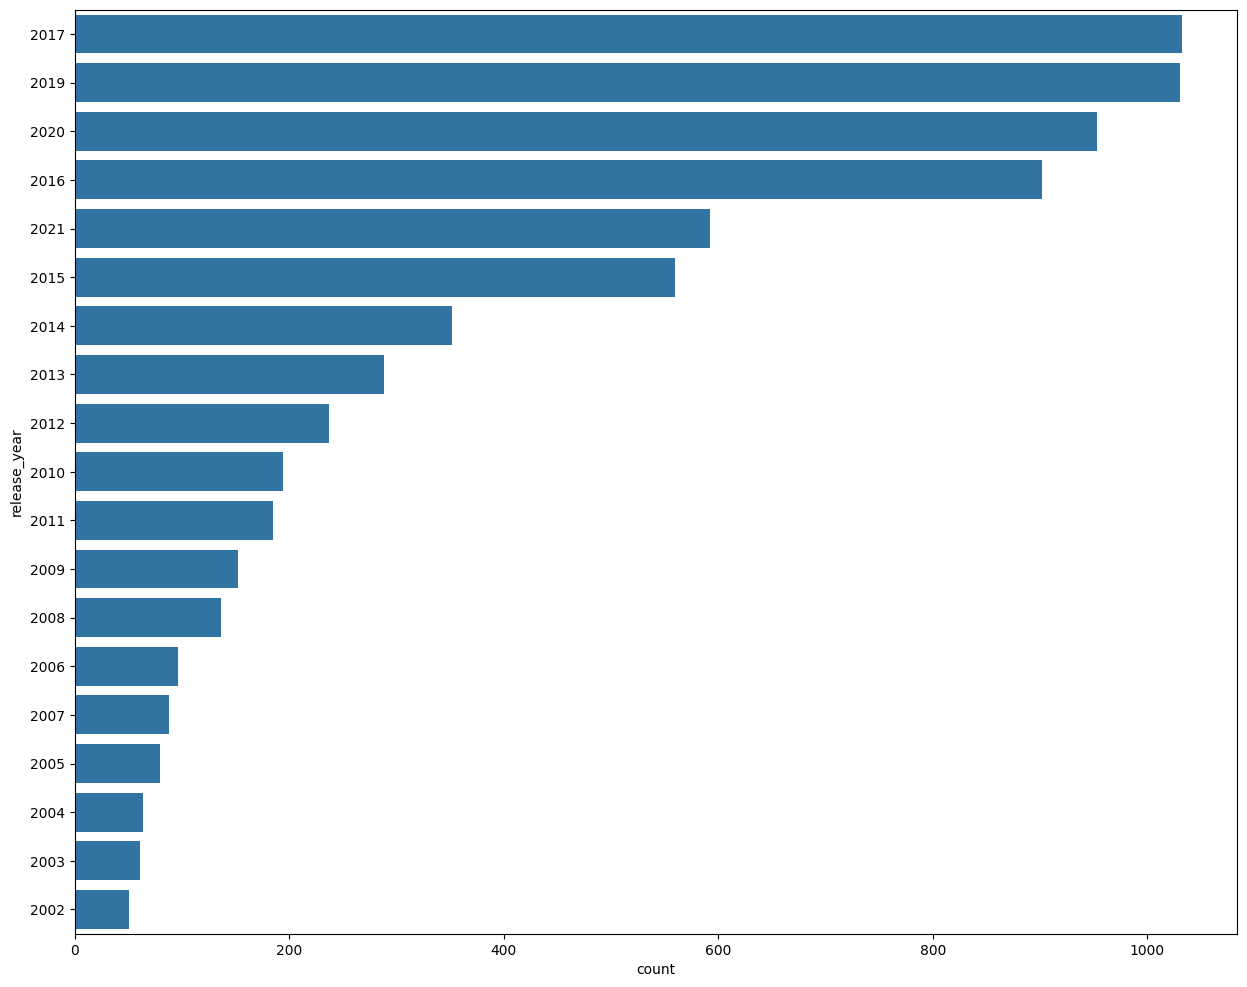

In [22]:
plt.figure(figsize=(15,12))
sns.countplot(y='release_year',order=df['release_year'].value_counts().index[1:20],data=df)

# 9. Country-wise Content Analysis

In [23]:
df['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise Content')

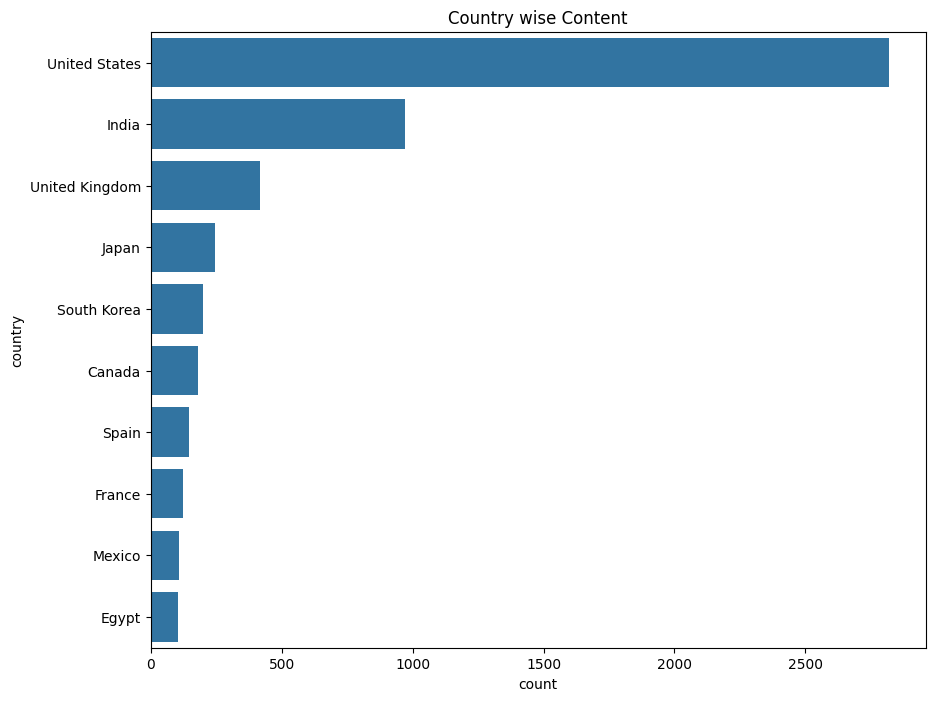

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df)
plt.title("Country wise Content")

# 10. Top 5 Directors on Netflix

In [25]:

df['director']=df['director'].fillna('Director not specified')

In [26]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Director not specified,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [27]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [28]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [29]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [30]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [31]:

directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [32]:
directors = directors[directors.Director != 'Director not specified']
directors

,Director,Total Count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [33]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

             Director  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [34]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


In [35]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = pl.bar(top5Directors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
barChart.show()

# 11. Top 5 Actors on Netflix


In [36]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [37]:
df['cast']=df['cast'].fillna('No cast specified')
cast_frame = pd.DataFrame()
cast_frame = df['cast'].str.split(',',expand=True).stack()
cast_frame = cast_frame.to_frame()
cast_frame.columns = ['Actor']
actors = cast_frame.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = pl.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

# 12. Year-wise Content Produced on Netflix


In [38]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [39]:
df2

,Release Year,Type,Total Count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [40]:
df2=df2[df2['Release Year']>=2000]
graph = pl.bar(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

## 12. Dividing Movies and TV shows in dataset Seprately


In [41]:
movies_df=df.loc[(df['type']=="Movie")]
movies_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [42]:
show_df=df.loc[(df['type']=="TV Show")]
show_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,No cast specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


## 14.Popular Genre Analysis on Netflix

Text(0.5, 1.0, 'Top Genere')

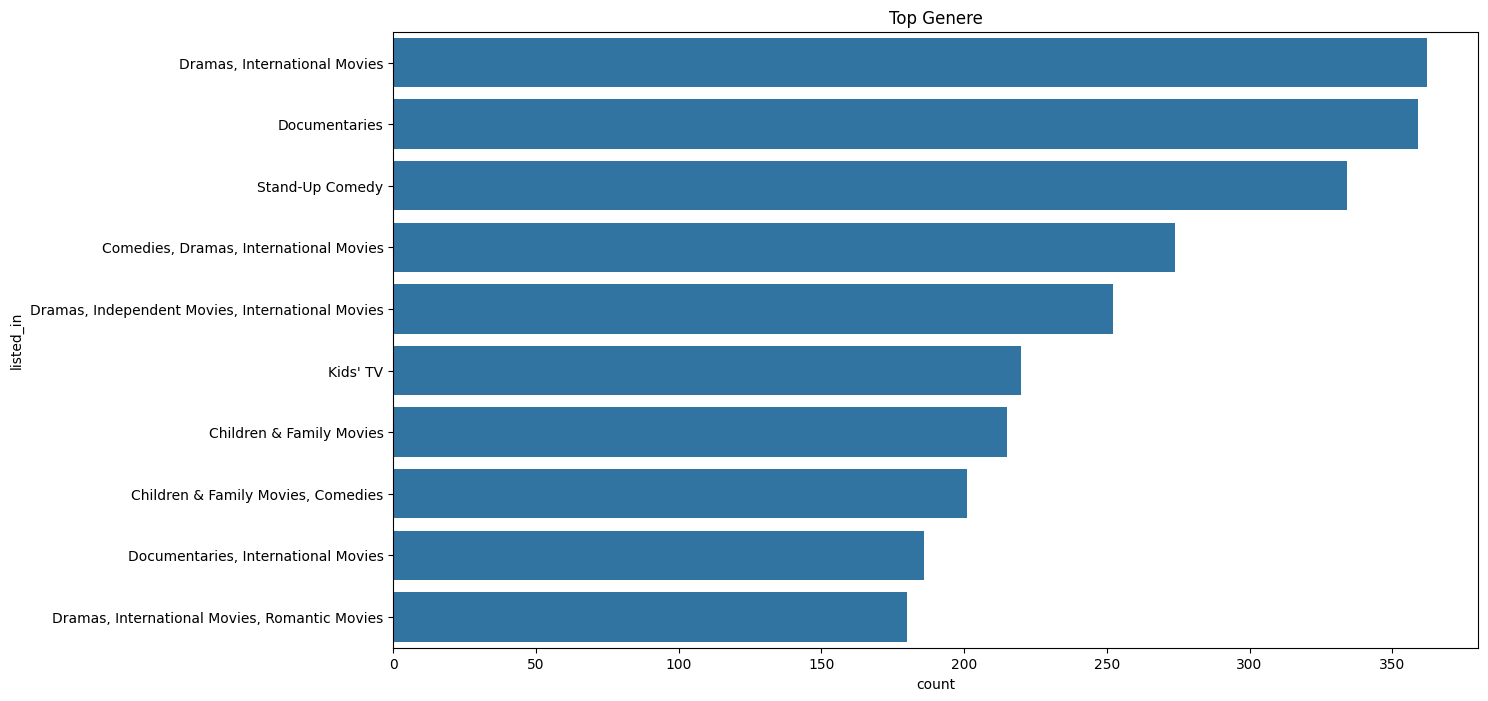

In [43]:
#popular genere analysis
plt.figure(figsize=(14,8))
sns.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:10],data=df)
plt.title("Top Genere")

These descriptions should help readers understand your code and analysis better by providing context and definitions for each section. Feel free to adjust or expand upon them based on the specific insights you want to highlight!